## FCR SOC Limit

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
C:\Users\local_TJANWALL27\Temp\ipykernel_8508\1619867378.py:21: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Ratio $E_{\mathrm{BESS}}$ [MWh] / $E_{\mathrm{BESS}}$ [MW]', fontsize=11)


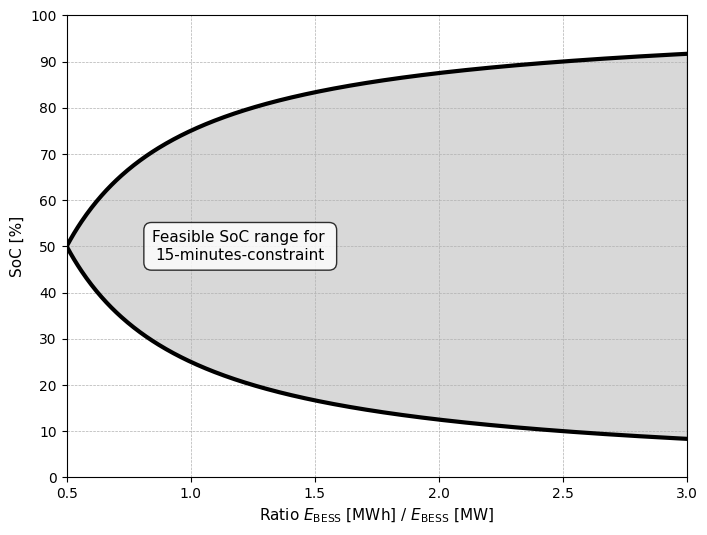

In [1]:
import numpy as np
import tikzplotlib
import matplotlib.pyplot as plt

# Ratio range (E / Ppq)
r = np.linspace(0.5, 3, 500)

# Equations
SoC_max = 1 - 0.25/r
SoC_min = 0.25/r

# Plot
plt.figure(figsize=(8,6))
plt.plot(r, SoC_max*100, 'k', linewidth=3)
plt.plot(r, SoC_min*100, 'k', linewidth=3)

# Fill area
plt.fill_between(r, SoC_min*100, SoC_max*100, color='gray', alpha=0.3)

# Labels and grid
plt.xlabel('Ratio $E_{\mathrm{BESS}}$ [MWh] / $E_{\mathrm{BESS}}$ [MW]', fontsize=11)
plt.ylabel('SoC [%]', fontsize=11)
plt.xlim(0.5,3)
plt.ylim(0,100)
plt.xticks(np.arange(0.5,3.5,0.5))
plt.yticks(np.arange(0,110,10))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add text box
plt.text(1.2,50,'Feasible SoC range for \n15-minutes-constraint', 
         ha='center', va='center', fontsize=11, 
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

plt.show()


AttributeError: module 'webcolors' has no attribute 'CSS3_HEX_TO_NAMES'

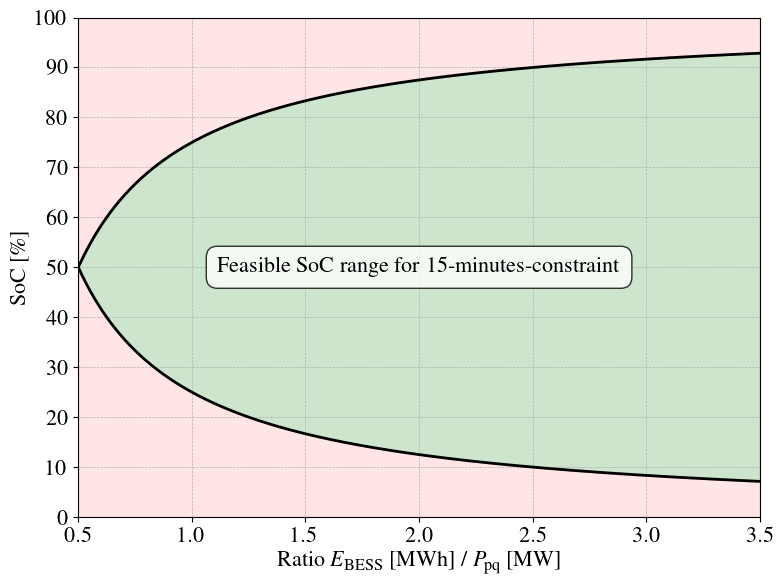

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tikzplotlib  

# Make sure LaTeX binary is in PATH
os.environ["PATH"] += r";C:\Python_Virtual_Enviroment\venv-scip-opt\Neuer Ordner (2)\miktex\bin\x64"

# Output folder
output_folder = r"C:\Users\TJANWALL\OneDrive - Elektrizitätswerke des Kantons Zürich\Dokumente\03_Overleaf\MA-Jan\plots"
os.makedirs(output_folder, exist_ok=True)  # create folder if it doesn't exist

# Use LaTeX-style fonts and rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    "font.size": 12,
    "axes.labelsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 10
})

# Ratio range (E / Ppq)
r = np.linspace(0.5, 3.5, 500)

# Equations
SoC_max = 1 - 0.25/r
SoC_min = 0.25/r

# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(r, SoC_max*100, 'k', linewidth=2, label=r'$SoC_{max}$')
ax.plot(r, SoC_min*100, 'k', linewidth=2, label=r'$SoC_{min}$')

# Fill area
ax.fill_between(r, SoC_min*100, SoC_max*100, color='green', alpha=0.2)
ax.fill_between(r, 0, SoC_min*100, color='red', alpha=0.1)
ax.fill_between(r, SoC_max*100, 100, color='red', alpha=0.1)

# Labels and grid
ax.set_xlabel(r'Ratio $E_{\mathrm{BESS}}$ [MWh] / $P_{\mathrm{pq}}$ [MW]')
ax.set_ylabel(r'SoC [\%]')
ax.set_xlim(0.5, 3.5)
ax.set_ylim(0, 100)
ax.set_xticks(np.arange(0.5, 4, 0.5))
ax.set_yticks(np.arange(0, 110, 10))
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add text box
ax.text(2, 50,
        r'Feasible SoC range for 15-minutes-constraint',
        ha='center', va='center',
        fontsize=16,
        bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

plt.tight_layout()

# -------------------------------
# Save outputs
tikz_path = os.path.join(output_folder, "SoC_plot.tex")
jpg_path = os.path.join(output_folder, "SoC_plot.jpg")

tikzplotlib.save(tikz_path)
fig.savefig(jpg_path, dpi=300)  # high-res JPG

plt.show()
